# Gradient Descent for Logistic Regression
In this notebook, we'll implement gradient descent algorithm for logitstic regression.
The training data and the structure of the functions are based on the course lab.

## Tools

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [24]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

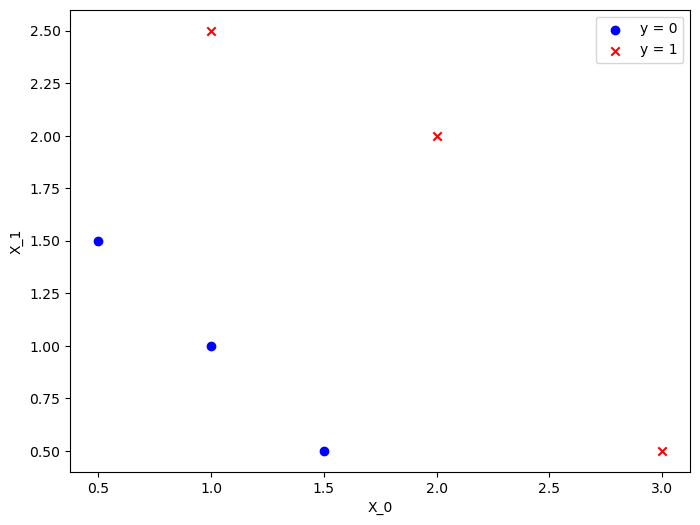

In [36]:
# Separate points by class
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='o', label='y = 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', label='y = 1')

# Labels and legend
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.legend()
plt.show()

## Logistic Gradient Descent

* For a logistic regression model
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{1} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{2} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{3} 
\end{align}
$$

* For logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{4}$$

where $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{5}$$ 

The gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{6}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{7} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{8} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target

## Implement Gradient Descent

We will implement gradient descent algorithm for logistic regression in a similar way as for linear regression, with the following three functions. 
- `compute_gradient_logistic` implementing equation (7) and (5) above
- `compute_cost_logistic` implementing equation (4) above
- `gradient_descent`, utilizing compute_gradient and compute_cost

In [25]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    z = np.dot(X, w) + b
    fx = 1 / (1 + np.exp((-1) * z))
    cost = (-1) * np.mean(y * np.log(fx) + (1 - y) * np.log((1 - fx)))
    return cost

### Test the function

In [26]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


**Expected output**: 0.3668667864055175

In [27]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    z = np.dot(X, w) + b
    fx = 1 / (1 + np.exp((-1) * z))
    dj_dw = np.mean((fx - y).reshape((-1, 1)) * X, axis=0)
    dj_db = np.mean((fx - y))
    return dj_dw, dj_db

Note that here we only needed to change the equation for $f(\vec{x})$ from the same function for linear regression.

In [28]:
### Test the function

In [29]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp, dj_db_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

In [30]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    w, b = w_in, b_in
    J_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(cost_function(X, y, w, b))
        p_history.append([w, b])

    return w, b, J_history, p_history

Note that here we can use exactly the same code as for linear regression.

## Run Gradient Descent
Run gradient descent on our dataset.

In [31]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, J_hist, p_hist = gradient_descent(X_train, y_train, w_tmp, b_tmp, compute_cost_logistic, compute_gradient_logistic, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


**Expected output:**
```
updated parameters: w:[5.28 5.08], b:-14.222409982019837
```

We can plot the learning curve:

Text(0.5, 1.0, 'Cost vs iteration')

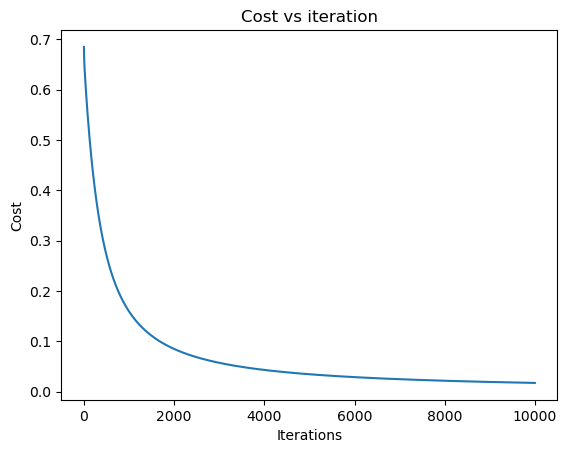

In [34]:
plt.plot(J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs iteration")

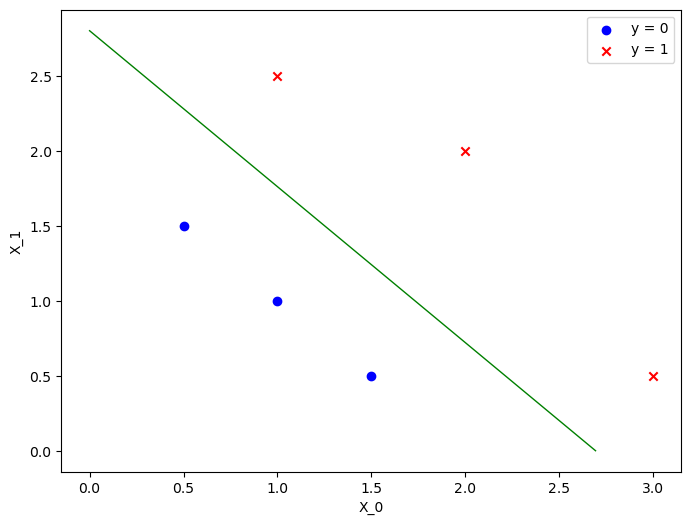

In [39]:
# Separate points by class
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='o', label='y = 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', label='y = 1')

# Labels and legend
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.legend()

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
plt.plot([0,x0],[x1,0], c='green', lw=1)
plt.show()